In [1]:
# Imports.
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Import the datasets
edsvc_df = pd.read_csv(r"C:\Users\mitch\Desktop\Analytical BootCamp\Project-1\CSV_files\2017_Educational services_ecnbasic.csv")
edsvc_df.head()

,NAICS2017 Label,Number Employed,"County, State",GEO ID,Broadband (%),Year
0,Educational services,0,"Benton County, Tennessee",0500000US47005,0.561538,2017
1,Educational services,25,"Warren County, Tennessee",0500000US47177,0.567398,2017
2,Educational services,0,"Washington County, Tennessee",0500000US47179,0.858978,2017
3,Educational services,0,"Weakley County, Tennessee",0500000US47183,0.628906,2017
4,Educational services,0,"Maury County, Tennessee",0500000US47119,0.840512,2017


In [5]:
broadband_df = pd.read_csv(r"C:\Users\mitch\Desktop\Analytical BootCamp\Project-1\CSV_files\clean_broadband.csv")
broadband_df.head()

,State,County,Year,GEO ID,Broadband (%),CFIPS
0,Alabama,Autauga County,2017,0500000US01001,0.618182,1001
1,Alabama,Autauga County,2018,0500000US01001,0.789000,1001
2,Alabama,Baldwin County,2007,0500000US01003,0.588521,1003
3,Alabama,Baldwin County,2008,0500000US01003,0.591518,1003
4,Alabama,Baldwin County,2009,0500000US01003,0.594515,1003


In [6]:
merge_census_df0 = pd.merge(edsvc_df , broadband_df, on= [ 'GEO ID' ], how='left', indicator='indicator')
print(len(edsvc_df))
print(len(broadband_df))
print(len(merge_census_df0))
merge_census_df0.head(5)


1456
13005
9594


In [12]:
merge_census_df = merge_census_df0.rename(columns= {'Broadband (%)_y' : 'Broadband %'})
merge_census_df.head(5)

,NAICS2017 Label,Number Employed,"County, State",GEO ID,Broadband (%)_x,Year_x,State,County,Year_y,Broadband %,CFIPS,indicator
0,Educational services,0,"Benton County, Tennessee",0500000US47005,0.561538,2017,Tennessee,Benton County,2017,0.561538,47005,both
1,Educational services,0,"Benton County, Tennessee",0500000US47005,0.561538,2017,Tennessee,Benton County,2018,0.601000,47005,both
2,Educational services,25,"Warren County, Tennessee",0500000US47177,0.567398,2017,Tennessee,Warren County,2017,0.567398,47177,both
3,Educational services,25,"Warren County, Tennessee",0500000US47177,0.567398,2017,Tennessee,Warren County,2018,0.684000,47177,both
4,Educational services,0,"Washington County, Tennessee",0500000US47179,0.858978,2017,Tennessee,Washington County,2013,0.790386,47179,both


Text(0, 0.5, 'Broadband (%)')

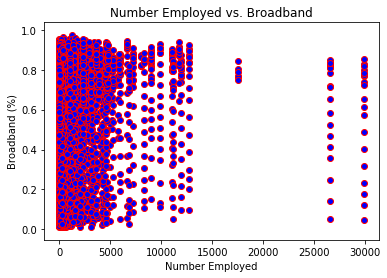

In [ ]:
plt.scatter( merge_census_df0['Number Employed'] , merge_census_df0['Broadband (%)_y'] , marker="o", facecolors="blue", edgecolors="red")
plt.title("Number Employed vs. Broadband")
plt.xlabel("Number Employed")
plt.ylabel("Broadband (%)")